In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def find_data_dir():
    data_path = 'data'
    while os.path.exists(data_path) != True:
        data_path = '../' + data_path
        
    return data_path

In [6]:
# MNIST dataset
mnist_train = datasets.MNIST(root=find_data_dir(),
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root=find_data_dir(),
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
print("Downloading Test Data Done ! ")

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# our model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.linear1 = nn.Linear(100, 256)
        self.bnorm1 = nn.BatchNorm1d(256)
        self.linear2 = nn.Linear(256, 512)
        self.bnorm2 = nn.BatchNorm1d(512)
        self.linear3 = nn.Linear(512, 784)
        
    def forward(self, X):
        X = F.leaky_relu(self.bnorm1(self.linear1(X)), negative_slope=0.03)
        X = F.leaky_relu(self.bnorm2(self.linear2(X)), negative_slope=0.03)
        X = torch.sigmoid(self.linear3(X))
        return X
    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 1)
    
    def forward(self, X):
        X = F.leaky_relu(self.linear1(X), negative_slope=0.03)
        X = F.leaky_relu(self.linear2(X), negative_slope=0.03)
        X = torch.sigmoid(self.linear3(X))
        return X

In [4]:
G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)

batch_size = 100

data_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)

In [5]:
def plot_generator(num = 10):
    z = torch.randn(num, 100).to(device)
    
    test_g = G.forward(z)
    plt.figure(figsize=(8, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(test_g[i].view(28, 28).data.cpu().numpy(), cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()
    

Iteration maker Done !
Epoch :  1 Iteration :  100 G_loss :  4.575795 D_loss :  0.3536766
Epoch :  1 Iteration :  200 G_loss :  2.5881333 D_loss :  0.38924932
Epoch :  1 Iteration :  300 G_loss :  4.1217012 D_loss :  0.07962014
Epoch :  1 Iteration :  400 G_loss :  5.1686025 D_loss :  0.06180905
Epoch :  1 Iteration :  500 G_loss :  6.053025 D_loss :  0.10527137
Epoch :  1 Iteration :  600 G_loss :  5.3230834 D_loss :  0.037317388


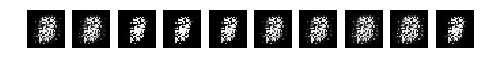

Epoch :  2 Iteration :  100 G_loss :  7.221195 D_loss :  0.05911503
Epoch :  2 Iteration :  200 G_loss :  6.2230024 D_loss :  0.042628873
Epoch :  2 Iteration :  300 G_loss :  4.557454 D_loss :  0.12444813
Epoch :  2 Iteration :  400 G_loss :  6.2240863 D_loss :  0.016980765
Epoch :  2 Iteration :  500 G_loss :  4.765402 D_loss :  0.03291741
Epoch :  2 Iteration :  600 G_loss :  5.0119815 D_loss :  0.12314915


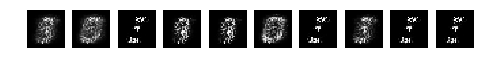

Epoch :  3 Iteration :  100 G_loss :  4.235182 D_loss :  0.104469754
Epoch :  3 Iteration :  200 G_loss :  4.0609746 D_loss :  0.07410918
Epoch :  3 Iteration :  300 G_loss :  4.7201905 D_loss :  0.0658614
Epoch :  3 Iteration :  400 G_loss :  4.627936 D_loss :  0.14323704
Epoch :  3 Iteration :  500 G_loss :  4.6187644 D_loss :  0.073926546
Epoch :  3 Iteration :  600 G_loss :  4.4253407 D_loss :  0.09289932


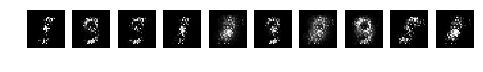

Epoch :  4 Iteration :  100 G_loss :  4.4185133 D_loss :  0.17192258
Epoch :  4 Iteration :  200 G_loss :  4.4960804 D_loss :  0.056352504
Epoch :  4 Iteration :  300 G_loss :  5.258385 D_loss :  0.09523413
Epoch :  4 Iteration :  400 G_loss :  4.5098433 D_loss :  0.057518154
Epoch :  4 Iteration :  500 G_loss :  5.4796576 D_loss :  0.11554551
Epoch :  4 Iteration :  600 G_loss :  4.2578034 D_loss :  0.062714815


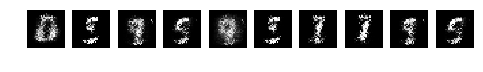

Epoch :  5 Iteration :  100 G_loss :  4.2699285 D_loss :  0.038454678
Epoch :  5 Iteration :  200 G_loss :  5.4958067 D_loss :  0.13896404
Epoch :  5 Iteration :  300 G_loss :  5.592666 D_loss :  0.109995365
Epoch :  5 Iteration :  400 G_loss :  4.7452946 D_loss :  0.10580193
Epoch :  5 Iteration :  500 G_loss :  5.877906 D_loss :  0.09220933
Epoch :  5 Iteration :  600 G_loss :  5.2684 D_loss :  0.09786915


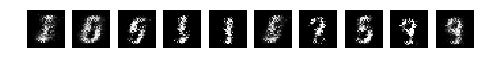

Epoch :  6 Iteration :  100 G_loss :  4.9301915 D_loss :  0.08488951
Epoch :  6 Iteration :  200 G_loss :  5.2126884 D_loss :  0.1021273
Epoch :  6 Iteration :  300 G_loss :  4.277155 D_loss :  0.14650515
Epoch :  6 Iteration :  400 G_loss :  4.2901926 D_loss :  0.1363002
Epoch :  6 Iteration :  500 G_loss :  6.0221124 D_loss :  0.06894707
Epoch :  6 Iteration :  600 G_loss :  5.3174815 D_loss :  0.12738644


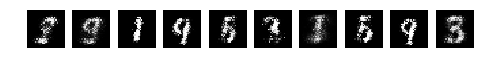

Epoch :  7 Iteration :  100 G_loss :  5.404681 D_loss :  0.07242044
Epoch :  7 Iteration :  200 G_loss :  5.800885 D_loss :  0.19376028
Epoch :  7 Iteration :  300 G_loss :  4.082431 D_loss :  0.31534153
Epoch :  7 Iteration :  400 G_loss :  6.167424 D_loss :  0.16472208
Epoch :  7 Iteration :  500 G_loss :  4.814407 D_loss :  0.25353596
Epoch :  7 Iteration :  600 G_loss :  4.9458795 D_loss :  0.20066884


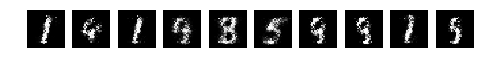

Epoch :  8 Iteration :  100 G_loss :  4.986557 D_loss :  0.16425182
Epoch :  8 Iteration :  200 G_loss :  4.6293445 D_loss :  0.1349196
Epoch :  8 Iteration :  300 G_loss :  4.3324614 D_loss :  0.3057629
Epoch :  8 Iteration :  400 G_loss :  4.437727 D_loss :  0.2578772
Epoch :  8 Iteration :  500 G_loss :  3.761871 D_loss :  0.27386776
Epoch :  8 Iteration :  600 G_loss :  4.5279264 D_loss :  0.18925005


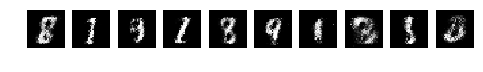

Epoch :  9 Iteration :  100 G_loss :  3.6374283 D_loss :  0.35642612
Epoch :  9 Iteration :  200 G_loss :  4.709412 D_loss :  0.24349424
Epoch :  9 Iteration :  300 G_loss :  4.0195813 D_loss :  0.13268454
Epoch :  9 Iteration :  400 G_loss :  4.1252894 D_loss :  0.18254882
Epoch :  9 Iteration :  500 G_loss :  5.4350653 D_loss :  0.23632446
Epoch :  9 Iteration :  600 G_loss :  4.128206 D_loss :  0.28208768


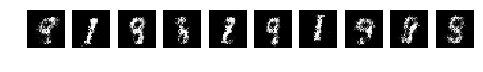

Epoch :  10 Iteration :  100 G_loss :  3.7391315 D_loss :  0.20249686
Epoch :  10 Iteration :  200 G_loss :  3.9669492 D_loss :  0.31548804
Epoch :  10 Iteration :  300 G_loss :  4.453421 D_loss :  0.41679236
Epoch :  10 Iteration :  400 G_loss :  4.5015407 D_loss :  0.1968709
Epoch :  10 Iteration :  500 G_loss :  3.4148371 D_loss :  0.31667727
Epoch :  10 Iteration :  600 G_loss :  3.9847498 D_loss :  0.48415416


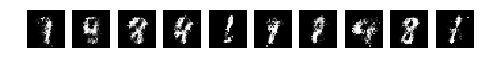

Epoch :  11 Iteration :  100 G_loss :  4.3249636 D_loss :  0.182273
Epoch :  11 Iteration :  200 G_loss :  3.7947128 D_loss :  0.33140057
Epoch :  11 Iteration :  300 G_loss :  3.979151 D_loss :  0.2150987
Epoch :  11 Iteration :  400 G_loss :  3.979389 D_loss :  0.45461172
Epoch :  11 Iteration :  500 G_loss :  4.136575 D_loss :  0.30074137
Epoch :  11 Iteration :  600 G_loss :  3.1649573 D_loss :  0.5518713


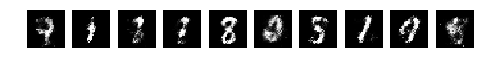

Epoch :  12 Iteration :  100 G_loss :  3.9888546 D_loss :  0.38523316
Epoch :  12 Iteration :  200 G_loss :  3.6107206 D_loss :  0.3834461
Epoch :  12 Iteration :  300 G_loss :  3.4314718 D_loss :  0.35057908
Epoch :  12 Iteration :  400 G_loss :  2.997407 D_loss :  0.67446387
Epoch :  12 Iteration :  500 G_loss :  3.1026602 D_loss :  0.4385705
Epoch :  12 Iteration :  600 G_loss :  3.789743 D_loss :  0.29783642


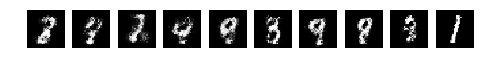

Epoch :  13 Iteration :  100 G_loss :  2.9459891 D_loss :  0.34817666
Epoch :  13 Iteration :  200 G_loss :  3.7452981 D_loss :  0.39090562
Epoch :  13 Iteration :  300 G_loss :  3.3433356 D_loss :  0.6348568
Epoch :  13 Iteration :  400 G_loss :  3.3079355 D_loss :  0.3595559
Epoch :  13 Iteration :  500 G_loss :  3.9150987 D_loss :  0.41587195
Epoch :  13 Iteration :  600 G_loss :  3.8636422 D_loss :  0.38345736


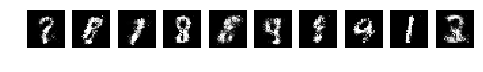

Epoch :  14 Iteration :  100 G_loss :  3.417888 D_loss :  0.32050294
Epoch :  14 Iteration :  200 G_loss :  3.0583127 D_loss :  0.657212
Epoch :  14 Iteration :  300 G_loss :  3.4373782 D_loss :  0.34666008
Epoch :  14 Iteration :  400 G_loss :  3.1732829 D_loss :  0.42371288
Epoch :  14 Iteration :  500 G_loss :  2.7139685 D_loss :  0.525938
Epoch :  14 Iteration :  600 G_loss :  3.071712 D_loss :  0.362183


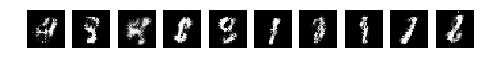

Epoch :  15 Iteration :  100 G_loss :  3.5173092 D_loss :  0.2827014
Epoch :  15 Iteration :  200 G_loss :  3.3880072 D_loss :  0.39142668
Epoch :  15 Iteration :  300 G_loss :  3.1555042 D_loss :  0.543991
Epoch :  15 Iteration :  400 G_loss :  2.9816675 D_loss :  0.40325886
Epoch :  15 Iteration :  500 G_loss :  2.5119243 D_loss :  0.4413967
Epoch :  15 Iteration :  600 G_loss :  3.1913788 D_loss :  0.54867554


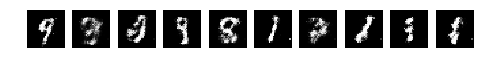

Epoch :  16 Iteration :  100 G_loss :  2.700158 D_loss :  0.5315084
Epoch :  16 Iteration :  200 G_loss :  2.7822168 D_loss :  0.33948755
Epoch :  16 Iteration :  300 G_loss :  2.8049374 D_loss :  0.4147513
Epoch :  16 Iteration :  400 G_loss :  2.8862057 D_loss :  0.59033334
Epoch :  16 Iteration :  500 G_loss :  2.7135272 D_loss :  0.47138762
Epoch :  16 Iteration :  600 G_loss :  2.6663232 D_loss :  0.5932619


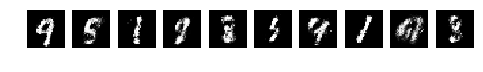

Epoch :  17 Iteration :  100 G_loss :  3.1491294 D_loss :  0.43891293
Epoch :  17 Iteration :  200 G_loss :  3.0223215 D_loss :  0.42312476
Epoch :  17 Iteration :  300 G_loss :  2.89987 D_loss :  0.44000155
Epoch :  17 Iteration :  400 G_loss :  2.4535768 D_loss :  0.47040606
Epoch :  17 Iteration :  500 G_loss :  2.904003 D_loss :  0.36737415
Epoch :  17 Iteration :  600 G_loss :  2.857664 D_loss :  0.5057116


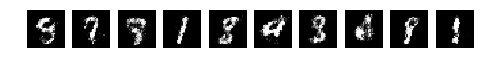

Epoch :  18 Iteration :  100 G_loss :  3.02513 D_loss :  0.46911895
Epoch :  18 Iteration :  200 G_loss :  3.315132 D_loss :  0.31876194
Epoch :  18 Iteration :  300 G_loss :  3.1758955 D_loss :  0.45210043
Epoch :  18 Iteration :  400 G_loss :  2.9219325 D_loss :  0.5828682
Epoch :  18 Iteration :  500 G_loss :  2.627567 D_loss :  0.54147714
Epoch :  18 Iteration :  600 G_loss :  2.9100502 D_loss :  0.5331797


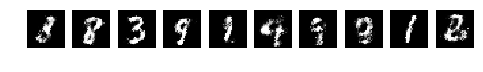

Epoch :  19 Iteration :  100 G_loss :  2.7652426 D_loss :  0.4083343
Epoch :  19 Iteration :  200 G_loss :  2.7618005 D_loss :  0.6642774
Epoch :  19 Iteration :  300 G_loss :  2.9428113 D_loss :  0.44561505
Epoch :  19 Iteration :  400 G_loss :  2.5715797 D_loss :  0.4844905
Epoch :  19 Iteration :  500 G_loss :  2.6591845 D_loss :  0.5159707
Epoch :  19 Iteration :  600 G_loss :  3.0875502 D_loss :  0.47500503


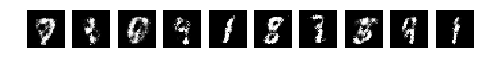

Epoch :  20 Iteration :  100 G_loss :  2.7937396 D_loss :  0.58070457
Epoch :  20 Iteration :  200 G_loss :  2.6245227 D_loss :  0.4360118
Epoch :  20 Iteration :  300 G_loss :  2.4631836 D_loss :  0.55673885
Epoch :  20 Iteration :  400 G_loss :  2.446346 D_loss :  0.6000107
Epoch :  20 Iteration :  500 G_loss :  2.3439605 D_loss :  0.4747151
Epoch :  20 Iteration :  600 G_loss :  2.8876166 D_loss :  0.55574524


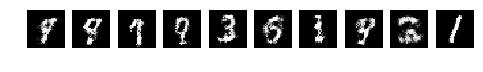

Epoch :  21 Iteration :  100 G_loss :  3.077497 D_loss :  0.5089175
Epoch :  21 Iteration :  200 G_loss :  2.6671414 D_loss :  0.44118738
Epoch :  21 Iteration :  300 G_loss :  1.9437454 D_loss :  0.6797874
Epoch :  21 Iteration :  400 G_loss :  2.8530684 D_loss :  0.4650715
Epoch :  21 Iteration :  500 G_loss :  2.1871355 D_loss :  0.61265284
Epoch :  21 Iteration :  600 G_loss :  2.7483811 D_loss :  0.4467811


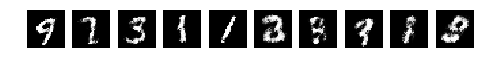

Epoch :  22 Iteration :  100 G_loss :  2.7253335 D_loss :  0.56468785
Epoch :  22 Iteration :  200 G_loss :  2.492688 D_loss :  0.4878971
Epoch :  22 Iteration :  300 G_loss :  2.3044164 D_loss :  0.577246
Epoch :  22 Iteration :  400 G_loss :  2.7981553 D_loss :  0.60071665
Epoch :  22 Iteration :  500 G_loss :  2.4578297 D_loss :  0.51609063
Epoch :  22 Iteration :  600 G_loss :  2.6202836 D_loss :  0.59415984


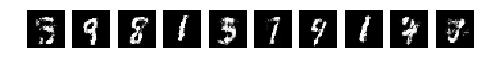

Epoch :  23 Iteration :  100 G_loss :  2.5842817 D_loss :  0.63299096
Epoch :  23 Iteration :  200 G_loss :  2.2765656 D_loss :  0.54948825
Epoch :  23 Iteration :  300 G_loss :  2.2144234 D_loss :  0.5793685
Epoch :  23 Iteration :  400 G_loss :  2.350706 D_loss :  0.5346622
Epoch :  23 Iteration :  500 G_loss :  2.66609 D_loss :  0.5407149
Epoch :  23 Iteration :  600 G_loss :  2.5621996 D_loss :  0.5992475


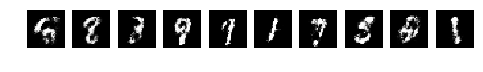

Epoch :  24 Iteration :  100 G_loss :  2.9374332 D_loss :  0.5778072
Epoch :  24 Iteration :  200 G_loss :  2.103337 D_loss :  0.62472665
Epoch :  24 Iteration :  300 G_loss :  2.4249682 D_loss :  0.48876035
Epoch :  24 Iteration :  400 G_loss :  2.5546246 D_loss :  0.5211658
Epoch :  24 Iteration :  500 G_loss :  2.6588917 D_loss :  0.6511955
Epoch :  24 Iteration :  600 G_loss :  3.0203826 D_loss :  0.3932341


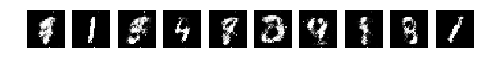

Epoch :  25 Iteration :  100 G_loss :  2.559584 D_loss :  0.45321155
Epoch :  25 Iteration :  200 G_loss :  2.986524 D_loss :  0.5656661
Epoch :  25 Iteration :  300 G_loss :  2.2980006 D_loss :  0.6824573
Epoch :  25 Iteration :  400 G_loss :  2.5789497 D_loss :  0.9742341
Epoch :  25 Iteration :  500 G_loss :  2.3434217 D_loss :  0.7468419
Epoch :  25 Iteration :  600 G_loss :  2.1417496 D_loss :  0.7120943


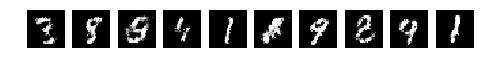

Epoch :  26 Iteration :  100 G_loss :  2.4822419 D_loss :  0.66312706
Epoch :  26 Iteration :  200 G_loss :  2.1306078 D_loss :  0.47687995
Epoch :  26 Iteration :  300 G_loss :  2.0740714 D_loss :  0.70647
Epoch :  26 Iteration :  400 G_loss :  1.9656132 D_loss :  0.6628934
Epoch :  26 Iteration :  500 G_loss :  2.359754 D_loss :  0.53997636
Epoch :  26 Iteration :  600 G_loss :  2.1816134 D_loss :  0.64314497


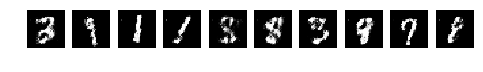

Epoch :  27 Iteration :  100 G_loss :  1.9912823 D_loss :  0.6729812
Epoch :  27 Iteration :  200 G_loss :  2.4521952 D_loss :  0.53353155
Epoch :  27 Iteration :  300 G_loss :  2.3072145 D_loss :  0.6085726
Epoch :  27 Iteration :  400 G_loss :  2.1058533 D_loss :  0.7007232
Epoch :  27 Iteration :  500 G_loss :  2.4396183 D_loss :  0.7595259
Epoch :  27 Iteration :  600 G_loss :  2.0198298 D_loss :  0.65479964


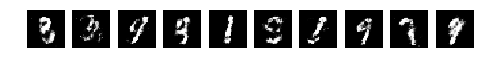

Epoch :  28 Iteration :  100 G_loss :  1.8785495 D_loss :  0.6670364
Epoch :  28 Iteration :  200 G_loss :  2.2609274 D_loss :  0.669137
Epoch :  28 Iteration :  300 G_loss :  2.4787655 D_loss :  0.6359912
Epoch :  28 Iteration :  400 G_loss :  2.1966255 D_loss :  0.5922724
Epoch :  28 Iteration :  500 G_loss :  1.9850427 D_loss :  0.54198176
Epoch :  28 Iteration :  600 G_loss :  2.018955 D_loss :  0.65193516


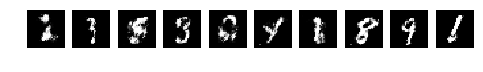

Epoch :  29 Iteration :  100 G_loss :  1.8707337 D_loss :  0.6669887
Epoch :  29 Iteration :  200 G_loss :  2.0224504 D_loss :  0.6393079
Epoch :  29 Iteration :  300 G_loss :  1.9862403 D_loss :  0.7371099
Epoch :  29 Iteration :  400 G_loss :  2.4874594 D_loss :  0.6306405
Epoch :  29 Iteration :  500 G_loss :  2.0200443 D_loss :  0.4816069
Epoch :  29 Iteration :  600 G_loss :  2.1361997 D_loss :  0.81467557


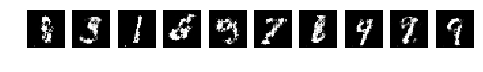

Epoch :  30 Iteration :  100 G_loss :  2.1408298 D_loss :  0.90190125
Epoch :  30 Iteration :  200 G_loss :  2.4526021 D_loss :  0.6357635
Epoch :  30 Iteration :  300 G_loss :  2.2076495 D_loss :  0.6531421
Epoch :  30 Iteration :  400 G_loss :  2.4403389 D_loss :  0.7319894
Epoch :  30 Iteration :  500 G_loss :  2.7714508 D_loss :  0.54553735
Epoch :  30 Iteration :  600 G_loss :  2.1397119 D_loss :  0.67512673


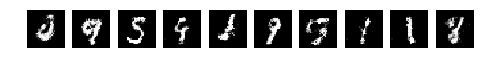

Epoch :  31 Iteration :  100 G_loss :  1.9575839 D_loss :  0.63222086
Epoch :  31 Iteration :  200 G_loss :  1.8711331 D_loss :  0.54823387
Epoch :  31 Iteration :  300 G_loss :  1.9013758 D_loss :  0.62189686
Epoch :  31 Iteration :  400 G_loss :  2.110421 D_loss :  0.76298356
Epoch :  31 Iteration :  500 G_loss :  2.17084 D_loss :  0.66658163
Epoch :  31 Iteration :  600 G_loss :  2.3167229 D_loss :  0.6057478


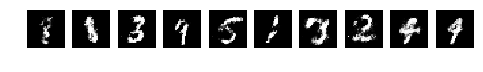

Epoch :  32 Iteration :  100 G_loss :  2.4672666 D_loss :  0.6365521
Epoch :  32 Iteration :  200 G_loss :  1.9855045 D_loss :  0.78881055
Epoch :  32 Iteration :  300 G_loss :  1.9285407 D_loss :  0.6456245
Epoch :  32 Iteration :  400 G_loss :  1.9018995 D_loss :  0.60702014
Epoch :  32 Iteration :  500 G_loss :  2.134715 D_loss :  0.76049584
Epoch :  32 Iteration :  600 G_loss :  1.6951909 D_loss :  0.75607526


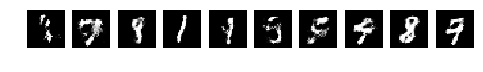

Epoch :  33 Iteration :  100 G_loss :  1.9402407 D_loss :  0.6381496
Epoch :  33 Iteration :  200 G_loss :  2.0013676 D_loss :  0.7888405
Epoch :  33 Iteration :  300 G_loss :  2.1219392 D_loss :  0.80378747
Epoch :  33 Iteration :  400 G_loss :  1.7015332 D_loss :  0.747681
Epoch :  33 Iteration :  500 G_loss :  2.0214949 D_loss :  0.6841218
Epoch :  33 Iteration :  600 G_loss :  2.1041293 D_loss :  0.6650631


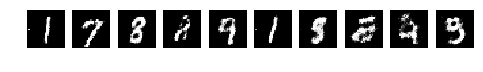

Epoch :  34 Iteration :  100 G_loss :  2.4170268 D_loss :  0.67626053
Epoch :  34 Iteration :  200 G_loss :  2.1447153 D_loss :  0.7381499
Epoch :  34 Iteration :  300 G_loss :  2.1263556 D_loss :  0.6302426
Epoch :  34 Iteration :  400 G_loss :  1.7415833 D_loss :  0.6442785
Epoch :  34 Iteration :  500 G_loss :  1.7667612 D_loss :  0.7083375
Epoch :  34 Iteration :  600 G_loss :  1.7807999 D_loss :  0.909559


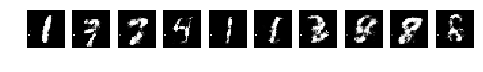

Epoch :  35 Iteration :  100 G_loss :  2.2275279 D_loss :  0.6868427
Epoch :  35 Iteration :  200 G_loss :  2.1505234 D_loss :  0.72014165
Epoch :  35 Iteration :  300 G_loss :  2.102557 D_loss :  0.58476484
Epoch :  35 Iteration :  400 G_loss :  2.4558642 D_loss :  0.7039192
Epoch :  35 Iteration :  500 G_loss :  2.2549815 D_loss :  0.69592834
Epoch :  35 Iteration :  600 G_loss :  2.087274 D_loss :  0.5365619


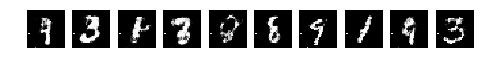

Epoch :  36 Iteration :  100 G_loss :  2.3685753 D_loss :  0.5884479
Epoch :  36 Iteration :  200 G_loss :  1.8413451 D_loss :  0.77898264
Epoch :  36 Iteration :  300 G_loss :  1.9511813 D_loss :  0.7979419
Epoch :  36 Iteration :  400 G_loss :  1.8280425 D_loss :  0.7224188
Epoch :  36 Iteration :  500 G_loss :  1.5620613 D_loss :  0.79191875
Epoch :  36 Iteration :  600 G_loss :  1.7946129 D_loss :  0.7174412


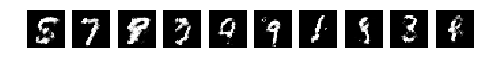

Epoch :  37 Iteration :  100 G_loss :  1.8768921 D_loss :  0.5478773
Epoch :  37 Iteration :  200 G_loss :  1.801591 D_loss :  0.7722865
Epoch :  37 Iteration :  300 G_loss :  1.6812491 D_loss :  0.71154046
Epoch :  37 Iteration :  400 G_loss :  1.7554717 D_loss :  0.7855202
Epoch :  37 Iteration :  500 G_loss :  1.8955207 D_loss :  0.69674724
Epoch :  37 Iteration :  600 G_loss :  1.783287 D_loss :  0.8146398


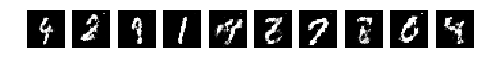

Epoch :  38 Iteration :  100 G_loss :  2.1772563 D_loss :  0.68975925
Epoch :  38 Iteration :  200 G_loss :  1.8867782 D_loss :  0.7166079
Epoch :  38 Iteration :  300 G_loss :  1.7872068 D_loss :  0.83289415
Epoch :  38 Iteration :  400 G_loss :  1.6948018 D_loss :  0.6802416
Epoch :  38 Iteration :  500 G_loss :  1.9925451 D_loss :  0.77672374
Epoch :  38 Iteration :  600 G_loss :  1.7182051 D_loss :  0.8153905


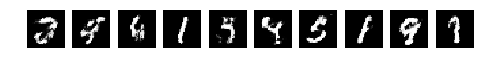

Epoch :  39 Iteration :  100 G_loss :  1.7252791 D_loss :  0.7195887
Epoch :  39 Iteration :  200 G_loss :  1.821675 D_loss :  0.7975582
Epoch :  39 Iteration :  300 G_loss :  1.8585609 D_loss :  0.88748324
Epoch :  39 Iteration :  400 G_loss :  1.9032155 D_loss :  0.625425
Epoch :  39 Iteration :  500 G_loss :  2.191407 D_loss :  0.66971195
Epoch :  39 Iteration :  600 G_loss :  2.1589575 D_loss :  0.57208353


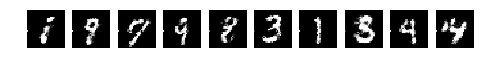

Epoch :  40 Iteration :  100 G_loss :  2.0165362 D_loss :  0.697732
Epoch :  40 Iteration :  200 G_loss :  1.786076 D_loss :  0.63225365
Epoch :  40 Iteration :  300 G_loss :  1.9400297 D_loss :  0.7326537
Epoch :  40 Iteration :  400 G_loss :  1.8196144 D_loss :  0.7790849
Epoch :  40 Iteration :  500 G_loss :  1.7514035 D_loss :  0.7344477
Epoch :  40 Iteration :  600 G_loss :  1.6386037 D_loss :  0.71745366


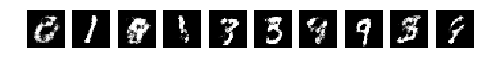

Epoch :  41 Iteration :  100 G_loss :  1.7595494 D_loss :  0.75650454
Epoch :  41 Iteration :  200 G_loss :  2.047999 D_loss :  0.7725208
Epoch :  41 Iteration :  300 G_loss :  1.7496696 D_loss :  0.9097312
Epoch :  41 Iteration :  400 G_loss :  1.5689943 D_loss :  0.96012807
Epoch :  41 Iteration :  500 G_loss :  1.9322805 D_loss :  0.8098851
Epoch :  41 Iteration :  600 G_loss :  1.7053334 D_loss :  0.98642874


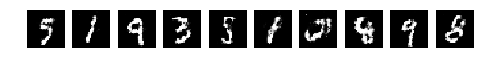

Epoch :  42 Iteration :  100 G_loss :  1.9765944 D_loss :  0.8843801
Epoch :  42 Iteration :  200 G_loss :  1.8357619 D_loss :  0.9109287
Epoch :  42 Iteration :  300 G_loss :  1.7242837 D_loss :  0.77443683
Epoch :  42 Iteration :  400 G_loss :  1.7554883 D_loss :  0.95301783
Epoch :  42 Iteration :  500 G_loss :  1.9076183 D_loss :  0.73134434
Epoch :  42 Iteration :  600 G_loss :  1.9093686 D_loss :  0.7424683


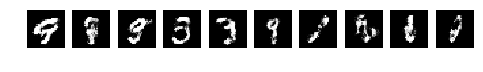

Epoch :  43 Iteration :  100 G_loss :  1.6985135 D_loss :  0.67355835
Epoch :  43 Iteration :  200 G_loss :  1.8568864 D_loss :  0.83746594
Epoch :  43 Iteration :  300 G_loss :  1.895914 D_loss :  0.7748634
Epoch :  43 Iteration :  400 G_loss :  1.6211913 D_loss :  0.69599575
Epoch :  43 Iteration :  500 G_loss :  1.6884294 D_loss :  0.7581779
Epoch :  43 Iteration :  600 G_loss :  1.7307309 D_loss :  0.9187192


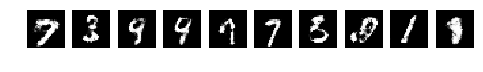

Epoch :  44 Iteration :  100 G_loss :  1.7478981 D_loss :  0.7252215
Epoch :  44 Iteration :  200 G_loss :  1.8192227 D_loss :  0.8830141
Epoch :  44 Iteration :  300 G_loss :  1.9130234 D_loss :  0.81973135
Epoch :  44 Iteration :  400 G_loss :  1.6910542 D_loss :  0.9166135
Epoch :  44 Iteration :  500 G_loss :  1.9517388 D_loss :  0.8586473
Epoch :  44 Iteration :  600 G_loss :  1.9260688 D_loss :  0.75733906


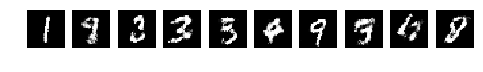

Epoch :  45 Iteration :  100 G_loss :  1.6346561 D_loss :  0.79282373
Epoch :  45 Iteration :  200 G_loss :  1.47543 D_loss :  0.7703008
Epoch :  45 Iteration :  300 G_loss :  1.516999 D_loss :  1.044233
Epoch :  45 Iteration :  400 G_loss :  1.7463739 D_loss :  0.8635401
Epoch :  45 Iteration :  500 G_loss :  1.7288773 D_loss :  0.8890426
Epoch :  45 Iteration :  600 G_loss :  1.7481428 D_loss :  0.76251423


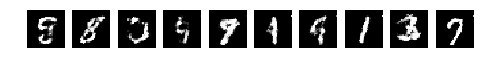

Epoch :  46 Iteration :  100 G_loss :  1.6629099 D_loss :  0.7993429
Epoch :  46 Iteration :  200 G_loss :  1.6249588 D_loss :  1.0038947
Epoch :  46 Iteration :  300 G_loss :  1.8155864 D_loss :  0.8280883
Epoch :  46 Iteration :  400 G_loss :  1.3943671 D_loss :  0.75914824
Epoch :  46 Iteration :  500 G_loss :  1.8000087 D_loss :  0.8287023
Epoch :  46 Iteration :  600 G_loss :  1.6748706 D_loss :  0.73292816


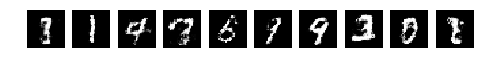

Epoch :  47 Iteration :  100 G_loss :  1.8383914 D_loss :  0.7629874
Epoch :  47 Iteration :  200 G_loss :  1.7607504 D_loss :  0.78269744
Epoch :  47 Iteration :  300 G_loss :  2.1720464 D_loss :  0.47686595
Epoch :  47 Iteration :  400 G_loss :  1.4417033 D_loss :  0.7665551
Epoch :  47 Iteration :  500 G_loss :  1.8932164 D_loss :  0.78315794
Epoch :  47 Iteration :  600 G_loss :  1.9529523 D_loss :  0.83179593


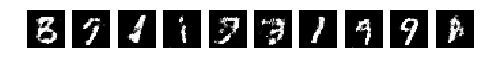

Epoch :  48 Iteration :  100 G_loss :  1.7680758 D_loss :  0.7920333
Epoch :  48 Iteration :  200 G_loss :  1.7663208 D_loss :  0.68677247
Epoch :  48 Iteration :  300 G_loss :  1.3787252 D_loss :  0.784385
Epoch :  48 Iteration :  400 G_loss :  1.6209337 D_loss :  0.9308169
Epoch :  48 Iteration :  500 G_loss :  2.115015 D_loss :  1.0103565
Epoch :  48 Iteration :  600 G_loss :  1.5832493 D_loss :  0.92508805


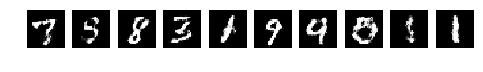

Epoch :  49 Iteration :  100 G_loss :  1.4245207 D_loss :  0.83849525
Epoch :  49 Iteration :  200 G_loss :  1.3762764 D_loss :  0.75553674
Epoch :  49 Iteration :  300 G_loss :  1.4680518 D_loss :  0.8818773
Epoch :  49 Iteration :  400 G_loss :  1.5923735 D_loss :  0.8762405
Epoch :  49 Iteration :  500 G_loss :  1.7206335 D_loss :  0.8747773
Epoch :  49 Iteration :  600 G_loss :  1.6439581 D_loss :  0.72994816


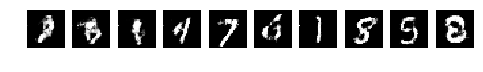

Epoch :  50 Iteration :  100 G_loss :  1.4775394 D_loss :  0.75066304
Epoch :  50 Iteration :  200 G_loss :  1.7639803 D_loss :  0.81413436
Epoch :  50 Iteration :  300 G_loss :  1.6555886 D_loss :  0.8283616
Epoch :  50 Iteration :  400 G_loss :  1.6216475 D_loss :  0.88928115
Epoch :  50 Iteration :  500 G_loss :  1.563444 D_loss :  0.9066317
Epoch :  50 Iteration :  600 G_loss :  1.6760155 D_loss :  0.7533694


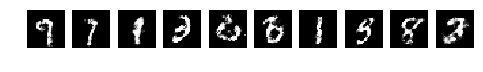

Epoch :  51 Iteration :  100 G_loss :  1.5111793 D_loss :  0.9579178
Epoch :  51 Iteration :  200 G_loss :  1.5340195 D_loss :  0.9404683
Epoch :  51 Iteration :  300 G_loss :  1.538939 D_loss :  0.75823593
Epoch :  51 Iteration :  400 G_loss :  1.9518901 D_loss :  0.8561237
Epoch :  51 Iteration :  500 G_loss :  1.7148954 D_loss :  0.78146183
Epoch :  51 Iteration :  600 G_loss :  1.6687438 D_loss :  0.87979865


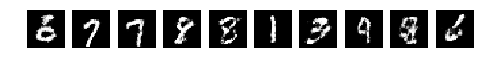

Epoch :  52 Iteration :  100 G_loss :  1.5683413 D_loss :  1.024086
Epoch :  52 Iteration :  200 G_loss :  1.7230486 D_loss :  0.7810693
Epoch :  52 Iteration :  300 G_loss :  1.7627573 D_loss :  0.78881407
Epoch :  52 Iteration :  400 G_loss :  1.4863586 D_loss :  0.8283334
Epoch :  52 Iteration :  500 G_loss :  1.9172903 D_loss :  0.71474755
Epoch :  52 Iteration :  600 G_loss :  1.7949339 D_loss :  0.7781284


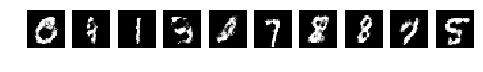

Epoch :  53 Iteration :  100 G_loss :  2.0208392 D_loss :  0.7059692
Epoch :  53 Iteration :  200 G_loss :  1.6681862 D_loss :  1.0676847
Epoch :  53 Iteration :  300 G_loss :  1.4374226 D_loss :  0.74539506
Epoch :  53 Iteration :  400 G_loss :  1.647703 D_loss :  0.83993787
Epoch :  53 Iteration :  500 G_loss :  1.6407516 D_loss :  0.8308238
Epoch :  53 Iteration :  600 G_loss :  1.7509761 D_loss :  1.0576651


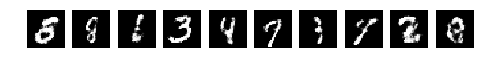

Epoch :  54 Iteration :  100 G_loss :  1.6380745 D_loss :  0.9247056
Epoch :  54 Iteration :  200 G_loss :  1.6624014 D_loss :  0.88684297
Epoch :  54 Iteration :  300 G_loss :  1.7192535 D_loss :  0.7745197
Epoch :  54 Iteration :  400 G_loss :  1.6636091 D_loss :  0.95396876
Epoch :  54 Iteration :  500 G_loss :  1.7440486 D_loss :  0.80987775
Epoch :  54 Iteration :  600 G_loss :  1.6614593 D_loss :  0.8781439


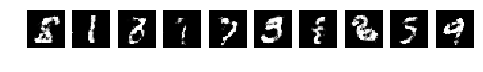

Epoch :  55 Iteration :  100 G_loss :  1.9586663 D_loss :  0.74032676
Epoch :  55 Iteration :  200 G_loss :  1.5343481 D_loss :  0.92443097
Epoch :  55 Iteration :  300 G_loss :  1.6382492 D_loss :  0.85120386
Epoch :  55 Iteration :  400 G_loss :  1.9020036 D_loss :  0.7380495
Epoch :  55 Iteration :  500 G_loss :  1.7573433 D_loss :  0.6912694
Epoch :  55 Iteration :  600 G_loss :  1.6053926 D_loss :  0.85115206


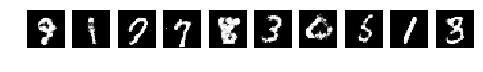

Epoch :  56 Iteration :  100 G_loss :  1.7013571 D_loss :  0.7274898
Epoch :  56 Iteration :  200 G_loss :  1.4461949 D_loss :  0.97345424
Epoch :  56 Iteration :  300 G_loss :  1.6594472 D_loss :  0.81874204
Epoch :  56 Iteration :  400 G_loss :  1.5226709 D_loss :  0.83881426
Epoch :  56 Iteration :  500 G_loss :  1.5823066 D_loss :  0.8402719
Epoch :  56 Iteration :  600 G_loss :  1.6241405 D_loss :  1.0241458


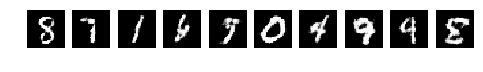

Epoch :  57 Iteration :  100 G_loss :  1.5493473 D_loss :  0.804909
Epoch :  57 Iteration :  200 G_loss :  1.5343966 D_loss :  0.755882
Epoch :  57 Iteration :  300 G_loss :  1.676888 D_loss :  0.9868876
Epoch :  57 Iteration :  400 G_loss :  1.4708657 D_loss :  0.8926854
Epoch :  57 Iteration :  500 G_loss :  1.6959828 D_loss :  0.8396574
Epoch :  57 Iteration :  600 G_loss :  1.5748225 D_loss :  0.8530476


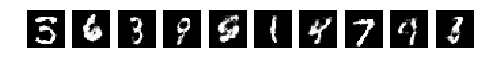

Epoch :  58 Iteration :  100 G_loss :  1.5680355 D_loss :  0.8276001
Epoch :  58 Iteration :  200 G_loss :  1.4638412 D_loss :  0.9334484
Epoch :  58 Iteration :  300 G_loss :  1.4522913 D_loss :  1.0088067
Epoch :  58 Iteration :  400 G_loss :  1.4861983 D_loss :  0.93168116
Epoch :  58 Iteration :  500 G_loss :  1.3451335 D_loss :  0.83561957
Epoch :  58 Iteration :  600 G_loss :  1.6453613 D_loss :  0.85345566


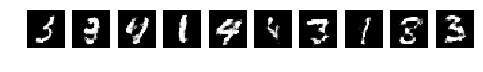

Epoch :  59 Iteration :  100 G_loss :  1.608963 D_loss :  0.88816315
Epoch :  59 Iteration :  200 G_loss :  1.4707115 D_loss :  0.8553255
Epoch :  59 Iteration :  300 G_loss :  1.8217548 D_loss :  0.8071226
Epoch :  59 Iteration :  400 G_loss :  1.7337925 D_loss :  0.7985023
Epoch :  59 Iteration :  500 G_loss :  1.3859102 D_loss :  0.8168827
Epoch :  59 Iteration :  600 G_loss :  1.9647104 D_loss :  0.80590004


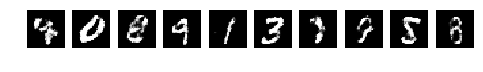

Epoch :  60 Iteration :  100 G_loss :  1.6818355 D_loss :  0.83569133
Epoch :  60 Iteration :  200 G_loss :  1.6568351 D_loss :  0.961928
Epoch :  60 Iteration :  300 G_loss :  1.6158932 D_loss :  0.8531382
Epoch :  60 Iteration :  400 G_loss :  1.5833237 D_loss :  0.70242417
Epoch :  60 Iteration :  500 G_loss :  1.5030911 D_loss :  0.9403713
Epoch :  60 Iteration :  600 G_loss :  1.7017817 D_loss :  0.8197757


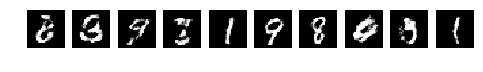

Epoch :  61 Iteration :  100 G_loss :  1.5608476 D_loss :  0.69186914
Epoch :  61 Iteration :  200 G_loss :  1.7045535 D_loss :  0.8354027
Epoch :  61 Iteration :  300 G_loss :  1.5457869 D_loss :  0.8235506
Epoch :  61 Iteration :  400 G_loss :  1.8607653 D_loss :  0.88518023
Epoch :  61 Iteration :  500 G_loss :  1.6156429 D_loss :  0.86877024
Epoch :  61 Iteration :  600 G_loss :  1.7777749 D_loss :  0.80964804


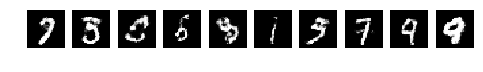

Epoch :  62 Iteration :  100 G_loss :  1.4813205 D_loss :  0.7489627
Epoch :  62 Iteration :  200 G_loss :  1.4943424 D_loss :  0.83875567
Epoch :  62 Iteration :  300 G_loss :  1.8124585 D_loss :  0.9988935
Epoch :  62 Iteration :  400 G_loss :  1.754655 D_loss :  0.88430595
Epoch :  62 Iteration :  500 G_loss :  1.6828712 D_loss :  0.7418132
Epoch :  62 Iteration :  600 G_loss :  1.6259884 D_loss :  0.9265879


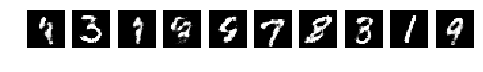

Epoch :  63 Iteration :  100 G_loss :  1.6189888 D_loss :  0.81021667
Epoch :  63 Iteration :  200 G_loss :  1.8190347 D_loss :  0.9768724
Epoch :  63 Iteration :  300 G_loss :  1.4530816 D_loss :  0.80412215
Epoch :  63 Iteration :  400 G_loss :  1.61397 D_loss :  0.82047445
Epoch :  63 Iteration :  500 G_loss :  1.5198789 D_loss :  0.8337105
Epoch :  63 Iteration :  600 G_loss :  1.6432085 D_loss :  0.9322642


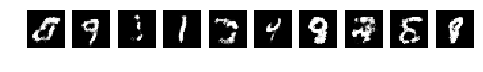

Epoch :  64 Iteration :  100 G_loss :  1.6364217 D_loss :  0.7762104
Epoch :  64 Iteration :  200 G_loss :  1.5617688 D_loss :  0.92959577
Epoch :  64 Iteration :  300 G_loss :  1.7737937 D_loss :  0.84429795
Epoch :  64 Iteration :  400 G_loss :  1.7848134 D_loss :  0.70559
Epoch :  64 Iteration :  500 G_loss :  1.9161713 D_loss :  0.73711336
Epoch :  64 Iteration :  600 G_loss :  1.5602927 D_loss :  0.88625777


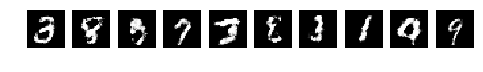

Epoch :  65 Iteration :  100 G_loss :  1.589651 D_loss :  0.9271844
Epoch :  65 Iteration :  200 G_loss :  1.5536528 D_loss :  0.85364103
Epoch :  65 Iteration :  300 G_loss :  1.6018089 D_loss :  0.774905
Epoch :  65 Iteration :  400 G_loss :  1.5964515 D_loss :  0.8022402
Epoch :  65 Iteration :  500 G_loss :  1.7118448 D_loss :  0.80679584
Epoch :  65 Iteration :  600 G_loss :  1.5502378 D_loss :  1.0522918


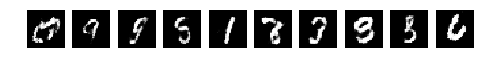

Epoch :  66 Iteration :  100 G_loss :  1.4581189 D_loss :  0.97032034
Epoch :  66 Iteration :  200 G_loss :  1.5128027 D_loss :  0.8928221
Epoch :  66 Iteration :  300 G_loss :  1.563544 D_loss :  0.8228229
Epoch :  66 Iteration :  400 G_loss :  1.4459834 D_loss :  0.82399285
Epoch :  66 Iteration :  500 G_loss :  1.4488628 D_loss :  0.8098849
Epoch :  66 Iteration :  600 G_loss :  1.6393434 D_loss :  0.93060017


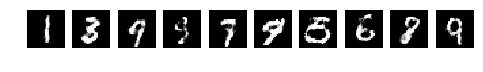

Epoch :  67 Iteration :  100 G_loss :  1.4902558 D_loss :  0.9219842
Epoch :  67 Iteration :  200 G_loss :  1.3388962 D_loss :  1.0130503
Epoch :  67 Iteration :  300 G_loss :  1.5370839 D_loss :  0.8472545
Epoch :  67 Iteration :  400 G_loss :  1.6937172 D_loss :  0.9104123
Epoch :  67 Iteration :  500 G_loss :  1.7024705 D_loss :  0.83625674
Epoch :  67 Iteration :  600 G_loss :  1.5052272 D_loss :  0.8903948


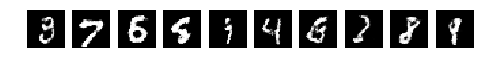

Epoch :  68 Iteration :  100 G_loss :  1.6070905 D_loss :  0.86123025
Epoch :  68 Iteration :  200 G_loss :  1.4036365 D_loss :  0.80200815
Epoch :  68 Iteration :  300 G_loss :  1.6094677 D_loss :  0.823072
Epoch :  68 Iteration :  400 G_loss :  1.4456216 D_loss :  0.87517893
Epoch :  68 Iteration :  500 G_loss :  1.4233003 D_loss :  0.86600703
Epoch :  68 Iteration :  600 G_loss :  1.480186 D_loss :  0.7839092


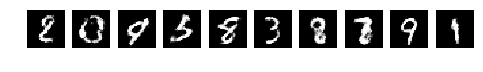

Epoch :  69 Iteration :  100 G_loss :  1.6404871 D_loss :  0.85365146
Epoch :  69 Iteration :  200 G_loss :  1.8231572 D_loss :  1.0538898
Epoch :  69 Iteration :  300 G_loss :  1.5928552 D_loss :  0.93583035
Epoch :  69 Iteration :  400 G_loss :  1.4043739 D_loss :  0.86475635
Epoch :  69 Iteration :  500 G_loss :  1.6183591 D_loss :  0.80912614
Epoch :  69 Iteration :  600 G_loss :  1.6746185 D_loss :  0.7633698


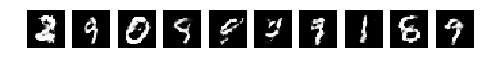

Epoch :  70 Iteration :  100 G_loss :  1.5295079 D_loss :  0.85642666
Epoch :  70 Iteration :  200 G_loss :  1.5718722 D_loss :  0.8837335
Epoch :  70 Iteration :  300 G_loss :  1.6750336 D_loss :  0.79783237
Epoch :  70 Iteration :  400 G_loss :  1.5314761 D_loss :  0.94965136
Epoch :  70 Iteration :  500 G_loss :  1.7618268 D_loss :  0.79593205
Epoch :  70 Iteration :  600 G_loss :  1.5208586 D_loss :  0.84041834


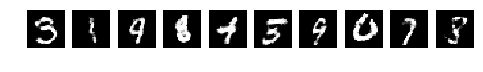

Epoch :  71 Iteration :  100 G_loss :  1.5642252 D_loss :  0.76486754
Epoch :  71 Iteration :  200 G_loss :  1.5015794 D_loss :  0.8735405
Epoch :  71 Iteration :  300 G_loss :  1.5810126 D_loss :  0.753947
Epoch :  71 Iteration :  400 G_loss :  1.5598416 D_loss :  0.8679943
Epoch :  71 Iteration :  500 G_loss :  1.5465367 D_loss :  0.8336841
Epoch :  71 Iteration :  600 G_loss :  1.4645209 D_loss :  0.87623143


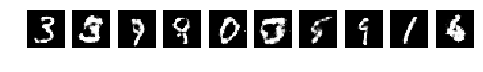

Epoch :  72 Iteration :  100 G_loss :  1.6038731 D_loss :  0.90180075
Epoch :  72 Iteration :  200 G_loss :  1.4658545 D_loss :  0.8246821
Epoch :  72 Iteration :  300 G_loss :  1.4985776 D_loss :  0.8725619
Epoch :  72 Iteration :  400 G_loss :  1.5550684 D_loss :  0.8033141
Epoch :  72 Iteration :  500 G_loss :  1.4623284 D_loss :  0.8262073
Epoch :  72 Iteration :  600 G_loss :  1.3529893 D_loss :  0.85359615


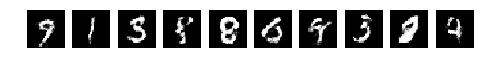

Epoch :  73 Iteration :  100 G_loss :  1.3795902 D_loss :  0.8554991
Epoch :  73 Iteration :  200 G_loss :  1.742084 D_loss :  0.8297435
Epoch :  73 Iteration :  300 G_loss :  1.6009105 D_loss :  0.89449596
Epoch :  73 Iteration :  400 G_loss :  1.5931641 D_loss :  0.67392015
Epoch :  73 Iteration :  500 G_loss :  1.331399 D_loss :  0.80182576
Epoch :  73 Iteration :  600 G_loss :  1.3523262 D_loss :  0.96324694


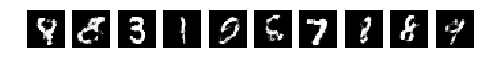

Epoch :  74 Iteration :  100 G_loss :  1.7469999 D_loss :  0.809311
Epoch :  74 Iteration :  200 G_loss :  1.5470434 D_loss :  0.95058477
Epoch :  74 Iteration :  300 G_loss :  1.5709519 D_loss :  0.720366
Epoch :  74 Iteration :  400 G_loss :  1.4414653 D_loss :  0.8454777
Epoch :  74 Iteration :  500 G_loss :  1.5205148 D_loss :  0.89385927
Epoch :  74 Iteration :  600 G_loss :  1.3925617 D_loss :  0.899509


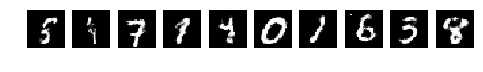

Epoch :  75 Iteration :  100 G_loss :  1.4813085 D_loss :  0.88313806
Epoch :  75 Iteration :  200 G_loss :  1.7810863 D_loss :  0.8917622
Epoch :  75 Iteration :  300 G_loss :  1.6729847 D_loss :  0.8575107
Epoch :  75 Iteration :  400 G_loss :  1.8046085 D_loss :  0.8908116
Epoch :  75 Iteration :  500 G_loss :  1.5439299 D_loss :  0.89561474
Epoch :  75 Iteration :  600 G_loss :  1.7289363 D_loss :  0.9948944


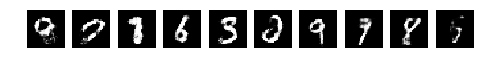

Epoch :  76 Iteration :  100 G_loss :  1.5828917 D_loss :  0.78808194
Epoch :  76 Iteration :  200 G_loss :  1.6426308 D_loss :  0.8230371
Epoch :  76 Iteration :  300 G_loss :  1.6454811 D_loss :  0.74886537
Epoch :  76 Iteration :  400 G_loss :  1.6778228 D_loss :  0.86268246
Epoch :  76 Iteration :  500 G_loss :  1.6451553 D_loss :  0.8002752
Epoch :  76 Iteration :  600 G_loss :  1.5485399 D_loss :  0.8701229


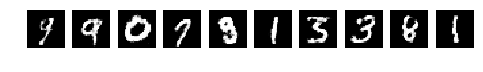

Epoch :  77 Iteration :  100 G_loss :  1.6084547 D_loss :  0.9108096
Epoch :  77 Iteration :  200 G_loss :  1.6013 D_loss :  0.8253368
Epoch :  77 Iteration :  300 G_loss :  1.4080763 D_loss :  0.9529009
Epoch :  77 Iteration :  400 G_loss :  1.4637845 D_loss :  0.76648664
Epoch :  77 Iteration :  500 G_loss :  1.6791389 D_loss :  1.047674
Epoch :  77 Iteration :  600 G_loss :  1.460858 D_loss :  1.0234014


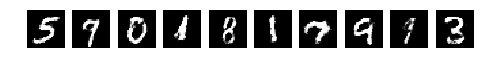

Epoch :  78 Iteration :  100 G_loss :  1.8486439 D_loss :  0.9311236
Epoch :  78 Iteration :  200 G_loss :  1.7302382 D_loss :  0.77631825
Epoch :  78 Iteration :  300 G_loss :  1.5703148 D_loss :  0.9724754
Epoch :  78 Iteration :  400 G_loss :  1.6952722 D_loss :  0.8383826
Epoch :  78 Iteration :  500 G_loss :  1.611533 D_loss :  0.8060974
Epoch :  78 Iteration :  600 G_loss :  1.517504 D_loss :  1.0692468


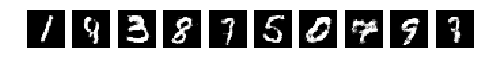

Epoch :  79 Iteration :  100 G_loss :  1.579853 D_loss :  0.9518307
Epoch :  79 Iteration :  200 G_loss :  1.5822976 D_loss :  0.87857026
Epoch :  79 Iteration :  300 G_loss :  1.6122879 D_loss :  0.9832159
Epoch :  79 Iteration :  400 G_loss :  1.5385482 D_loss :  0.7600546
Epoch :  79 Iteration :  500 G_loss :  1.6623993 D_loss :  1.0521437
Epoch :  79 Iteration :  600 G_loss :  1.6871421 D_loss :  0.87516224


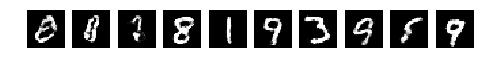

Epoch :  80 Iteration :  100 G_loss :  1.4352301 D_loss :  0.81377244
Epoch :  80 Iteration :  200 G_loss :  1.5539976 D_loss :  0.9510801
Epoch :  80 Iteration :  300 G_loss :  1.7390416 D_loss :  0.9168221
Epoch :  80 Iteration :  400 G_loss :  1.7579224 D_loss :  0.96068406
Epoch :  80 Iteration :  500 G_loss :  1.3051132 D_loss :  0.9180888
Epoch :  80 Iteration :  600 G_loss :  1.4835263 D_loss :  0.9236052


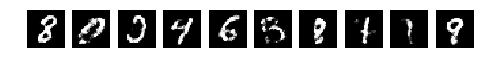

Epoch :  81 Iteration :  100 G_loss :  1.6723682 D_loss :  0.90141505
Epoch :  81 Iteration :  200 G_loss :  1.6685348 D_loss :  0.95296156
Epoch :  81 Iteration :  300 G_loss :  1.3862395 D_loss :  0.970636
Epoch :  81 Iteration :  400 G_loss :  1.5836744 D_loss :  0.89882624
Epoch :  81 Iteration :  500 G_loss :  1.5530725 D_loss :  0.88360685
Epoch :  81 Iteration :  600 G_loss :  1.5856589 D_loss :  0.88183224


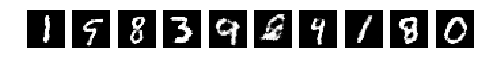

Epoch :  82 Iteration :  100 G_loss :  1.8879523 D_loss :  0.91387665
Epoch :  82 Iteration :  200 G_loss :  1.4822079 D_loss :  0.9095741
Epoch :  82 Iteration :  300 G_loss :  1.5901457 D_loss :  0.9484445
Epoch :  82 Iteration :  400 G_loss :  1.4687243 D_loss :  0.9787222
Epoch :  82 Iteration :  500 G_loss :  1.3627821 D_loss :  0.82846105
Epoch :  82 Iteration :  600 G_loss :  1.6755899 D_loss :  0.7838879


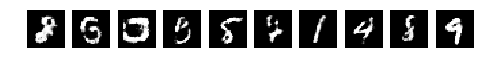

Epoch :  83 Iteration :  100 G_loss :  1.6049263 D_loss :  0.93868697
Epoch :  83 Iteration :  200 G_loss :  1.5303438 D_loss :  0.8309886
Epoch :  83 Iteration :  300 G_loss :  1.5568753 D_loss :  0.9136821
Epoch :  83 Iteration :  400 G_loss :  1.5566106 D_loss :  0.94002306
Epoch :  83 Iteration :  500 G_loss :  1.4833771 D_loss :  0.94279283
Epoch :  83 Iteration :  600 G_loss :  1.7985872 D_loss :  0.9547595


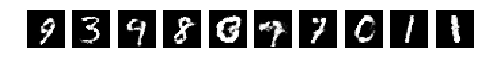

Epoch :  84 Iteration :  100 G_loss :  1.486878 D_loss :  0.8872372
Epoch :  84 Iteration :  200 G_loss :  1.7893373 D_loss :  0.86304504
Epoch :  84 Iteration :  300 G_loss :  1.6355973 D_loss :  0.847772
Epoch :  84 Iteration :  400 G_loss :  1.466936 D_loss :  0.8706695
Epoch :  84 Iteration :  500 G_loss :  1.5444617 D_loss :  0.87912095
Epoch :  84 Iteration :  600 G_loss :  1.566211 D_loss :  0.9715508


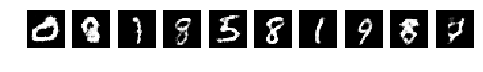

Epoch :  85 Iteration :  100 G_loss :  1.779741 D_loss :  0.8605696
Epoch :  85 Iteration :  200 G_loss :  1.5774771 D_loss :  0.9404404
Epoch :  85 Iteration :  300 G_loss :  1.5707161 D_loss :  0.83073777
Epoch :  85 Iteration :  400 G_loss :  1.5927212 D_loss :  0.8908533
Epoch :  85 Iteration :  500 G_loss :  1.59577 D_loss :  0.9088569
Epoch :  85 Iteration :  600 G_loss :  1.5477767 D_loss :  0.72400576


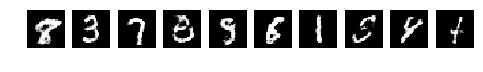

Epoch :  86 Iteration :  100 G_loss :  1.6233236 D_loss :  0.8957132
Epoch :  86 Iteration :  200 G_loss :  1.4482865 D_loss :  0.9300332
Epoch :  86 Iteration :  300 G_loss :  1.5795555 D_loss :  1.0074034
Epoch :  86 Iteration :  400 G_loss :  1.6690881 D_loss :  0.8050637
Epoch :  86 Iteration :  500 G_loss :  1.5157024 D_loss :  0.8950508
Epoch :  86 Iteration :  600 G_loss :  1.6024579 D_loss :  0.86883795


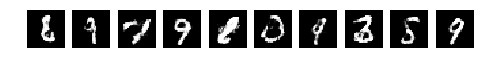

Epoch :  87 Iteration :  100 G_loss :  1.5821273 D_loss :  0.87840927
Epoch :  87 Iteration :  200 G_loss :  1.5279367 D_loss :  0.8960159
Epoch :  87 Iteration :  300 G_loss :  1.7878188 D_loss :  0.95360464
Epoch :  87 Iteration :  400 G_loss :  1.4340372 D_loss :  0.80639184
Epoch :  87 Iteration :  500 G_loss :  1.4644986 D_loss :  0.94526005
Epoch :  87 Iteration :  600 G_loss :  1.8506517 D_loss :  0.8421773


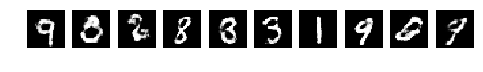

Epoch :  88 Iteration :  100 G_loss :  1.8632176 D_loss :  0.84995836
Epoch :  88 Iteration :  200 G_loss :  1.6334149 D_loss :  0.90894765
Epoch :  88 Iteration :  300 G_loss :  1.5141246 D_loss :  0.7982242
Epoch :  88 Iteration :  400 G_loss :  1.5064474 D_loss :  0.78885746
Epoch :  88 Iteration :  500 G_loss :  1.7114403 D_loss :  0.83636767
Epoch :  88 Iteration :  600 G_loss :  1.3603114 D_loss :  0.8820095


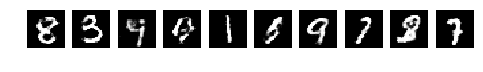

Epoch :  89 Iteration :  100 G_loss :  1.5708604 D_loss :  0.95466256
Epoch :  89 Iteration :  200 G_loss :  1.6187117 D_loss :  0.8749896
Epoch :  89 Iteration :  300 G_loss :  1.6459385 D_loss :  0.75317365
Epoch :  89 Iteration :  400 G_loss :  1.6289849 D_loss :  0.87756526
Epoch :  89 Iteration :  500 G_loss :  1.3944348 D_loss :  0.77206314
Epoch :  89 Iteration :  600 G_loss :  1.4697213 D_loss :  1.0655389


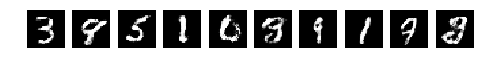

Epoch :  90 Iteration :  100 G_loss :  1.5233704 D_loss :  0.92351854
Epoch :  90 Iteration :  200 G_loss :  1.6875429 D_loss :  0.8942263
Epoch :  90 Iteration :  300 G_loss :  1.6275078 D_loss :  0.8213241
Epoch :  90 Iteration :  400 G_loss :  1.5157425 D_loss :  0.8943955
Epoch :  90 Iteration :  500 G_loss :  1.6212256 D_loss :  0.88942856
Epoch :  90 Iteration :  600 G_loss :  1.4435748 D_loss :  1.006221


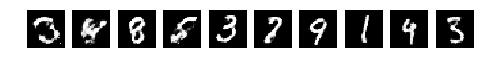

Epoch :  91 Iteration :  100 G_loss :  1.3204052 D_loss :  0.80197155
Epoch :  91 Iteration :  200 G_loss :  1.67821 D_loss :  0.8312795
Epoch :  91 Iteration :  300 G_loss :  1.594064 D_loss :  0.85950756
Epoch :  91 Iteration :  400 G_loss :  1.7046939 D_loss :  0.7209368
Epoch :  91 Iteration :  500 G_loss :  1.4085485 D_loss :  0.8431455
Epoch :  91 Iteration :  600 G_loss :  1.4132876 D_loss :  1.0304997


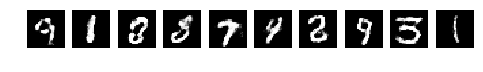

Epoch :  92 Iteration :  100 G_loss :  1.4951514 D_loss :  1.0851628
Epoch :  92 Iteration :  200 G_loss :  1.6162581 D_loss :  0.8530814
Epoch :  92 Iteration :  300 G_loss :  1.5847646 D_loss :  0.7960418
Epoch :  92 Iteration :  400 G_loss :  1.5110234 D_loss :  0.9549178
Epoch :  92 Iteration :  500 G_loss :  1.638675 D_loss :  0.9180342
Epoch :  92 Iteration :  600 G_loss :  1.6299897 D_loss :  0.99015045


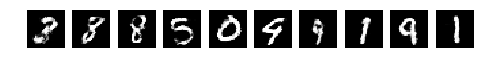

Epoch :  93 Iteration :  100 G_loss :  1.8207835 D_loss :  0.82718384
Epoch :  93 Iteration :  200 G_loss :  1.5061097 D_loss :  0.77902746
Epoch :  93 Iteration :  300 G_loss :  1.596189 D_loss :  0.9434767
Epoch :  93 Iteration :  400 G_loss :  1.6441619 D_loss :  0.93037105
Epoch :  93 Iteration :  500 G_loss :  1.5091693 D_loss :  0.79382133
Epoch :  93 Iteration :  600 G_loss :  1.6389377 D_loss :  0.94725513


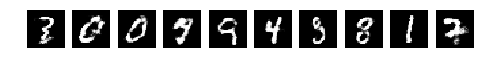

Epoch :  94 Iteration :  100 G_loss :  1.5911189 D_loss :  0.96990824
Epoch :  94 Iteration :  200 G_loss :  1.6249563 D_loss :  0.8698714
Epoch :  94 Iteration :  300 G_loss :  1.7764642 D_loss :  0.8560282
Epoch :  94 Iteration :  400 G_loss :  1.5058839 D_loss :  0.89197093
Epoch :  94 Iteration :  500 G_loss :  1.7524437 D_loss :  0.93202037
Epoch :  94 Iteration :  600 G_loss :  1.7989961 D_loss :  0.922153


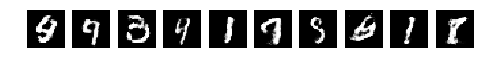

Epoch :  95 Iteration :  100 G_loss :  1.7696339 D_loss :  0.9171888
Epoch :  95 Iteration :  200 G_loss :  1.6557213 D_loss :  0.8032129
Epoch :  95 Iteration :  300 G_loss :  1.6363605 D_loss :  0.96488327
Epoch :  95 Iteration :  400 G_loss :  1.6402904 D_loss :  0.9345921
Epoch :  95 Iteration :  500 G_loss :  1.6439058 D_loss :  0.90734684
Epoch :  95 Iteration :  600 G_loss :  1.4817598 D_loss :  0.8618392


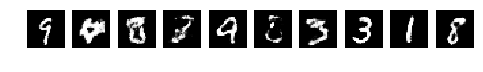

Epoch :  96 Iteration :  100 G_loss :  1.5174621 D_loss :  0.95815843
Epoch :  96 Iteration :  200 G_loss :  1.6044976 D_loss :  0.82598275
Epoch :  96 Iteration :  300 G_loss :  1.513984 D_loss :  0.8472067
Epoch :  96 Iteration :  400 G_loss :  1.5893134 D_loss :  1.0146577
Epoch :  96 Iteration :  500 G_loss :  1.5951694 D_loss :  0.80245614
Epoch :  96 Iteration :  600 G_loss :  1.5599135 D_loss :  0.813344


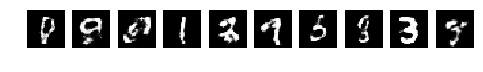

Epoch :  97 Iteration :  100 G_loss :  1.5643126 D_loss :  0.85181487
Epoch :  97 Iteration :  200 G_loss :  1.6054763 D_loss :  0.88993835
Epoch :  97 Iteration :  300 G_loss :  1.4971972 D_loss :  0.8136132
Epoch :  97 Iteration :  400 G_loss :  1.5417962 D_loss :  0.8729361
Epoch :  97 Iteration :  500 G_loss :  1.5420392 D_loss :  0.86652887
Epoch :  97 Iteration :  600 G_loss :  1.6092533 D_loss :  0.95152855


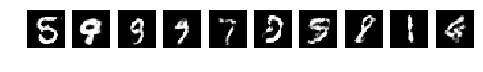

Epoch :  98 Iteration :  100 G_loss :  1.3202541 D_loss :  0.8876108
Epoch :  98 Iteration :  200 G_loss :  1.6976277 D_loss :  0.8973005
Epoch :  98 Iteration :  300 G_loss :  1.7828006 D_loss :  0.89855015
Epoch :  98 Iteration :  400 G_loss :  1.5974298 D_loss :  0.8055637
Epoch :  98 Iteration :  500 G_loss :  1.6953162 D_loss :  0.79606056
Epoch :  98 Iteration :  600 G_loss :  1.6807381 D_loss :  0.9118191


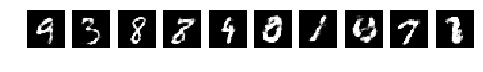

Epoch :  99 Iteration :  100 G_loss :  1.6955502 D_loss :  1.0020859
Epoch :  99 Iteration :  200 G_loss :  1.706236 D_loss :  0.9531803
Epoch :  99 Iteration :  300 G_loss :  1.6918777 D_loss :  0.90722287
Epoch :  99 Iteration :  400 G_loss :  1.5856246 D_loss :  0.83051205
Epoch :  99 Iteration :  500 G_loss :  1.511243 D_loss :  0.8782362
Epoch :  99 Iteration :  600 G_loss :  1.413074 D_loss :  0.85837936


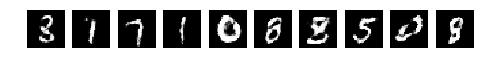

Epoch :  100 Iteration :  100 G_loss :  1.5614058 D_loss :  0.8272352
Epoch :  100 Iteration :  200 G_loss :  1.414589 D_loss :  1.0016637
Epoch :  100 Iteration :  300 G_loss :  1.6087762 D_loss :  0.8921752
Epoch :  100 Iteration :  400 G_loss :  1.6124343 D_loss :  0.90157247
Epoch :  100 Iteration :  500 G_loss :  1.422468 D_loss :  0.9381719
Epoch :  100 Iteration :  600 G_loss :  1.5743179 D_loss :  0.8606364


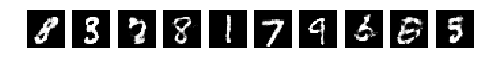

In [7]:
print("Iteration maker Done !")

# Training loop
for epoch in range(100):
    avg_loss = 0
    total_batch = len(mnist_train) // batch_size
    for i, (batch_img, _) in enumerate(data_iter):
        
        X = batch_img.view(batch_size, -1).to(device)
        
        real_lab = torch.ones(batch_size, 1).to(device)
        
        fake_lab = torch.zeros(batch_size, 1).to(device)
        
        # Training Discriminator
        D_pred = D.forward(X)
        d_loss_real = criterion(D_pred, real_lab)
        real_score = D_pred
        
        z = torch.randn(batch_size, 100).to(device)
        
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        d_loss_fake = criterion(G_pred, fake_lab)
        fake_score = G_pred
        
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        
        # Training Generator
        z = torch.randn(batch_size, 100).to(device)
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        g_loss = criterion(G_pred, real_lab)
        
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1)%200 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, "G_loss : ", g_loss.data.cpu().numpy(), "D_loss : ", d_loss.data.cpu().numpy())
    plot_generator()
        
        
torch.save(G.state_dict(), './trained/Vanilla/sd_gen')
torch.save(D.state_dict(), './trained/Vanilla/sd_dis')

torch.save(G, './trained/Vanilla/gen.pt')
torch.save(D, './trained/Vanilla/dis.pt')